In [16]:
from csv import reader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from collections import Counter

In [17]:
# DO NOT USE - for array population only
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

In [61]:
#data = pd.read_csv('data/location_transfer.csv', index_col='PERSON_ID')
data = pd.read_csv('data/location_transfer.csv')

In [95]:
data[:22]

,PERSON_ID,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,VISIT_START_DATETIME,VISIT_END_DATETIME,CARE_SITE_ID,CARE_SITE_NAME
0,5076351,232202115,2019-10-30 01:14:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
1,5076351,232202115,2019-10-30 04:41:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
2,5076351,232202115,2019-10-30 04:47:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
3,5076351,232202115,2019-10-30 09:06:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
4,5076351,232202115,2019-10-30 10:24:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
5,5076351,232202115,2019-10-30 21:36:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
6,5076351,232202115,2019-10-30 21:50:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA
7,5076351,232202115,2019-10-30 21:50:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
8,5076351,232202115,2019-10-30 23:59:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA
9,5076351,232202115,2019-10-31 23:59:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA


In [165]:
dataset = data[['VISIT_OCCURRENCE_ID', 'CARE_SITE_DATETIME', 'CARE_SITE_NAME']]
dataset['id'] = pd.Categorical((pd.factorize(data.VISIT_OCCURRENCE_ID)[0]))

C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
dataset[:22]

,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,CARE_SITE_NAME,id
0,232202115,2019-10-30 01:14:00.0000000,VUH EMERGENCY,0
1,232202115,2019-10-30 04:41:00.0000000,VUH EMERGENCY,0
2,232202115,2019-10-30 04:47:00.0000000,VUH EMERGENCY,0
3,232202115,2019-10-30 09:06:00.0000000,VUH EMERGENCY,0
4,232202115,2019-10-30 10:24:00.0000000,VUH EMERGENCY,0
5,232202115,2019-10-30 21:36:00.0000000,VUH EMERGENCY,0
6,232202115,2019-10-30 21:50:00.0000000,VUH 10N TRAUMA,0
7,232202115,2019-10-30 21:50:00.0000000,VUH EMERGENCY,0
8,232202115,2019-10-30 23:59:00.0000000,VUH 10N TRAUMA,0
9,232202115,2019-10-31 23:59:00.0000000,VUH 10N TRAUMA,0


In [147]:
edges = []
for i in range(1, 22):
    if (dataset.CARE_SITE_NAME.values[i] != dataset.CARE_SITE_NAME.values[i-1]) & (dataset.VISIT_OCCURRENCE_ID.values[i] == dataset.VISIT_OCCURRENCE_ID.values[i-1]):
        edges.append((dataset.CARE_SITE_NAME.values[i-1], dataset.CARE_SITE_NAME.values[i]))

In [149]:
edges_df = pd.DataFrame(edges, columns = ['from', 'to'])

In [150]:
edges_df

,from,to
0,VUH EMERGENCY,VUH 10N TRAUMA
1,VUH 10N TRAUMA,VUH EMERGENCY
2,VUH EMERGENCY,VUH 10N TRAUMA
3,VUH 10N TRAUMA,VUH MAIN OR
4,VUH MAIN OR,VUH 10N TRAUMA
5,VUH 10N TRAUMA,VUH MAIN OR
6,VUH MAIN OR,VUH 10N TRAUMA
7,VUH 10N TRAUMA,ZZZ-VUH10SORTHOTRAUMA


In [151]:
graph = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(edges).items())
print(*graph.edges(data=True), sep='\n')

('VUH EMERGENCY', 'VUH 10N TRAUMA', {'weight': 2})
('VUH 10N TRAUMA', 'VUH EMERGENCY', {'weight': 1})
('VUH 10N TRAUMA', 'VUH MAIN OR', {'weight': 2})
('VUH 10N TRAUMA', 'ZZZ-VUH10SORTHOTRAUMA', {'weight': 1})
('VUH MAIN OR', 'VUH 10N TRAUMA', {'weight': 2})


In [166]:
edges_weighted = list(Counter(edges).items())
#params = list((x, y, {'weight':v}) for (x,y), v in edges_weighted)
params = list((x, y, v) for (x,y), v in edges_weighted)
params_df = pd.DataFrame(params, columns = ['from', 'to', 'weight'])

In [167]:
params_df

,from,to,weight
0,VUH EMERGENCY,VUH 10N TRAUMA,2
1,VUH 10N TRAUMA,VUH EMERGENCY,1
2,VUH 10N TRAUMA,VUH MAIN OR,2
3,VUH MAIN OR,VUH 10N TRAUMA,2
4,VUH 10N TRAUMA,ZZZ-VUH10SORTHOTRAUMA,1


In [168]:
#dataset['ID'] = dataset.index.astype('category').cat.rename_categories(range(0, dataset.index.nunique()+1))
#data['id'] = pd.Categorical((pd.factorize(data.PERSON_ID)[0]))
# site_time = data.iloc[:,0]
# location = data.loc[:,'CARE_SITE_NAME']

In [169]:
# populate graph with columns in dataframe
# i think this does the same thing as 'graph' from above
graph2 = nx.Graph()
graph2 = nx.from_pandas_edgelist(params_df[:22], source='from', target='to', edge_attr='weight', create_using=nx.DiGraph())
# graph_small = nx.from_pandas_drataframe(dataset[:300],source='PERSON_ID',
#                                    target='CARE_SITE_NAME',edge_attr=True,
#                                    create_using=nx.DiGraph())
#graph2 = nx.DiGraph.add_weighted_edges_from(edges_weighted)

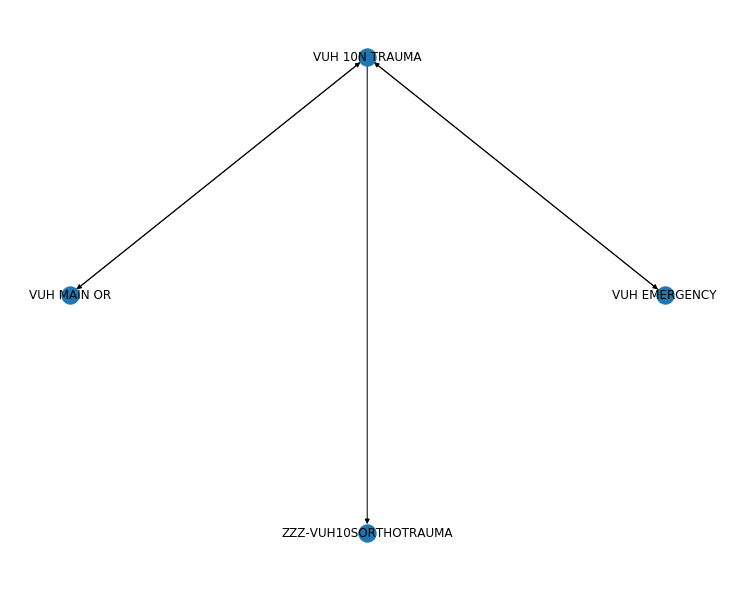

In [172]:
plt.figure(figsize=(10, 8))
nx.draw_shell(graph, with_labels=True)

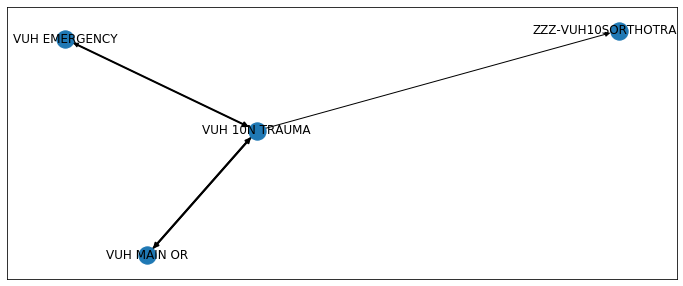

In [173]:
weights = [i['weight'] for i in dict(graph.edges).values()]
labels = [i for i in dict(graph.nodes).keys()]
labels = {i:i for i in dict(graph.nodes).keys()}

fig, ax = plt.subplots(figsize=(12,5))
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos, ax = ax, labels=True)
nx.draw_networkx_edges(graph, pos, width=weights, ax=ax)
_ = nx.draw_networkx_labels(graph, pos, labels, ax=ax)

In [174]:
# connections from a single node
graph['VUH EMERGENCY']

AtlasView({'VUH 10N TRAUMA': {'weight': 2}})

In [175]:
total_connections = {}
for x in graph.nodes:
    total_connections[x] = len(graph[x])
s = pd.Series(total_connections, name='transfers')
df2 = s.to_frame().sort_values('transfers', ascending=False)

In [176]:
df2.head()

,transfers
VUH 10N TRAUMA,3
VUH EMERGENCY,1
VUH MAIN OR,1
ZZZ-VUH10SORTHOTRAUMA,0
